# Clustering

... using fake data.

In [13]:
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(42)

In [3]:
# Function for creating datapoints in the form of a circle
def PointsInCircum(r,n=100):
    return [(math.cos(2*math.pi/n*x)*r+np.random.normal(-30,30),math.sin(2*math.pi/n*x)*r+np.random.normal(-30,30)) for x in range(1,n+1)]

In [7]:
# Creating data points in the form of a circle
df=pd.DataFrame(PointsInCircum(500,1000))
df=df.append(PointsInCircum(300,700))
df=df.append(PointsInCircum(100,300))

# Adding noise to the dataset
df = df.append(
    [
        (np.random.randint(-600, 600), np.random.randint(-600, 600))
        for _ in range(300)
    ]
)
df

C:\Users\victo\AppData\Local\Temp\ipykernel_10588\2312938194.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(PointsInCircum(300,700))
C:\Users\victo\AppData\Local\Temp\ipykernel_10588\2312938194.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(PointsInCircum(100,300))
C:\Users\victo\AppData\Local\Temp\ipykernel_10588\2312938194.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(


,0,1
0,484.609288,5.299468
1,443.582039,-13.259126
2,466.155943,4.830683
3,466.385368,-28.983239
4,485.980536,11.990455
...,...,...
295,-433.000000,-515.000000
296,248.000000,474.000000
297,535.000000,-159.000000
298,-330.000000,-257.000000


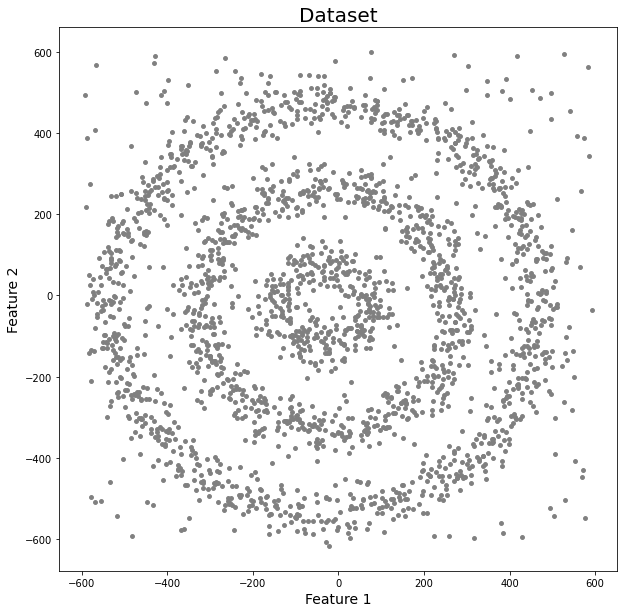

In [14]:
plt.figure(figsize=(10,10))
plt.scatter(df[0],df[1],s=15,color='grey')
plt.title('Dataset',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()

**K-Means**

...because it is the simpliest cluster algorithm.

In [15]:
from sklearn.cluster import KMeans
k_means=KMeans(n_clusters=4,random_state=42)
k_means.fit(df[[0,1]])

KMeans(n_clusters=4, random_state=42)

In [16]:
df['KMeans_labels']=k_means.labels_

In [18]:
df.head(5)

,0,1,KMeans_labels
0,484.609288,5.299468,3
1,443.582039,-13.259126,3
2,466.155943,4.830683,3
3,466.385368,-28.983239,3
4,485.980536,11.990455,3


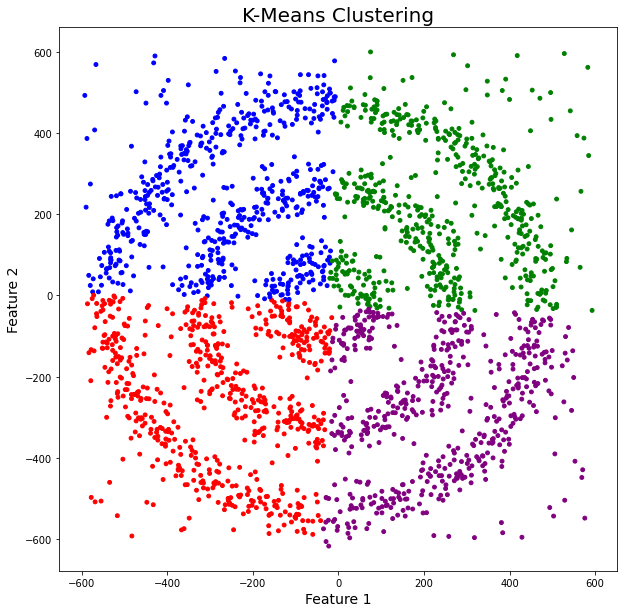

In [19]:
# Plotting resulting clusters
colors=['purple','red','blue','green']
plt.figure(figsize=(10,10))
plt.scatter(df[0],df[1],c=df['KMeans_labels'],cmap=matplotlib.colors.ListedColormap(colors),s=15)
plt.title('K-Means Clustering',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()

**Hierarchical clustering**

With Agglomerative Clustering.

In [20]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=4, affinity='euclidean')
model.fit(df[[0,1]])

AgglomerativeClustering(n_clusters=4)

In [21]:
df['HR_labels']=model.labels_

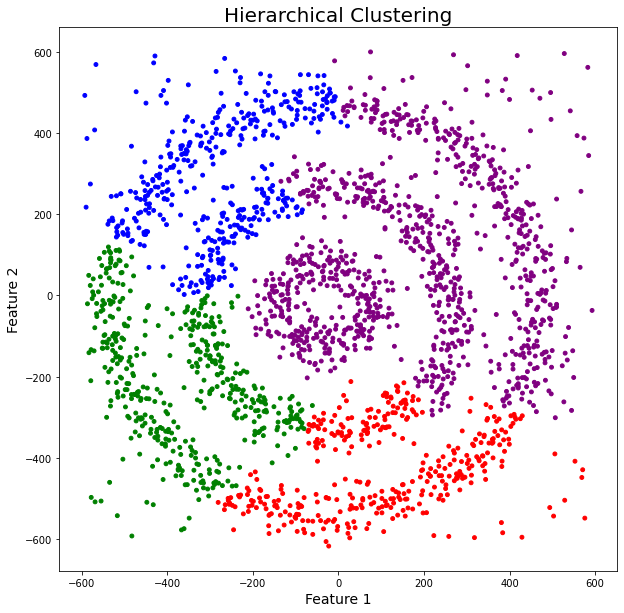

In [22]:
# Plotting resulting clusters
plt.figure(figsize=(10,10))
plt.scatter(df[0],df[1],c=df['HR_labels'],cmap=matplotlib.colors.ListedColormap(colors),s=15)
plt.title('Hierarchical Clustering',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()

**DBSCAN**

...the aim of this study.

In [23]:
from sklearn.cluster import DBSCAN
dbscan=DBSCAN()
dbscan.fit(df[[0,1]])

DBSCAN()

Here, epsilon is 0.5, and min_samples or minPoints is 5. Let’s visualize the results from this model:

In [127]:
df['DBSCAN_labels']=dbscan.labels_
df['DBSCAN_labels'].unique()

array([-1], dtype=int64)

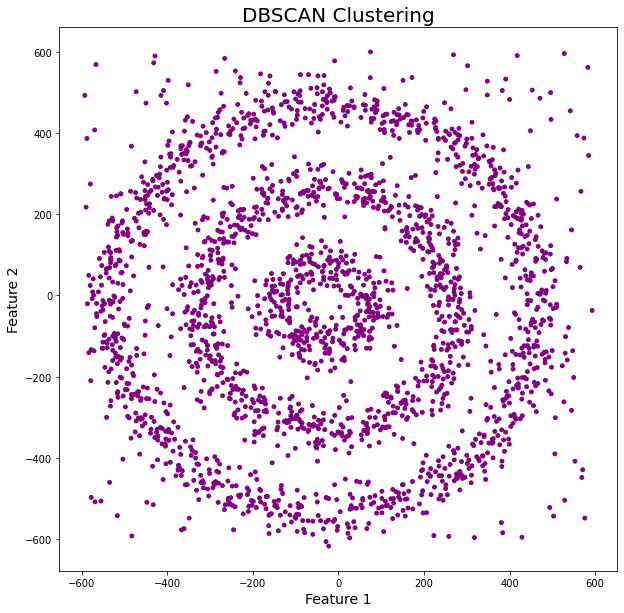

In [25]:
# Plotting resulting clusters
plt.figure(figsize=(10,10))
plt.scatter(df[0],df[1],c=df['DBSCAN_labels'],cmap=matplotlib.colors.ListedColormap(colors),s=15)
plt.title('DBSCAN Clustering',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()

All the data points were purple, and we saw on the cell above that all labels were -1, which means all points are treated as noise. It is because the value of epsilon is very small.

We didn’t optimize parameters.

Let's define the value of epsilon and minPoints and then train our model again.

For epsilon, we could use the K-distance graph. For plotting a K-distance Graph, we need the distance between a point and its nearest data point for all data points in the dataset. We can obtain this using NearestNeighbors from sklearn.neighbors.

In [28]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(df[[0,1]])
distances, indices = nbrs.kneighbors(df[[0,1]])

The distance variable contains an array of distances between a data point and its nearest data point for all data points in the dataset.

Let’s plot our K-distance graph and find the value of epsilon. Use the following syntax:

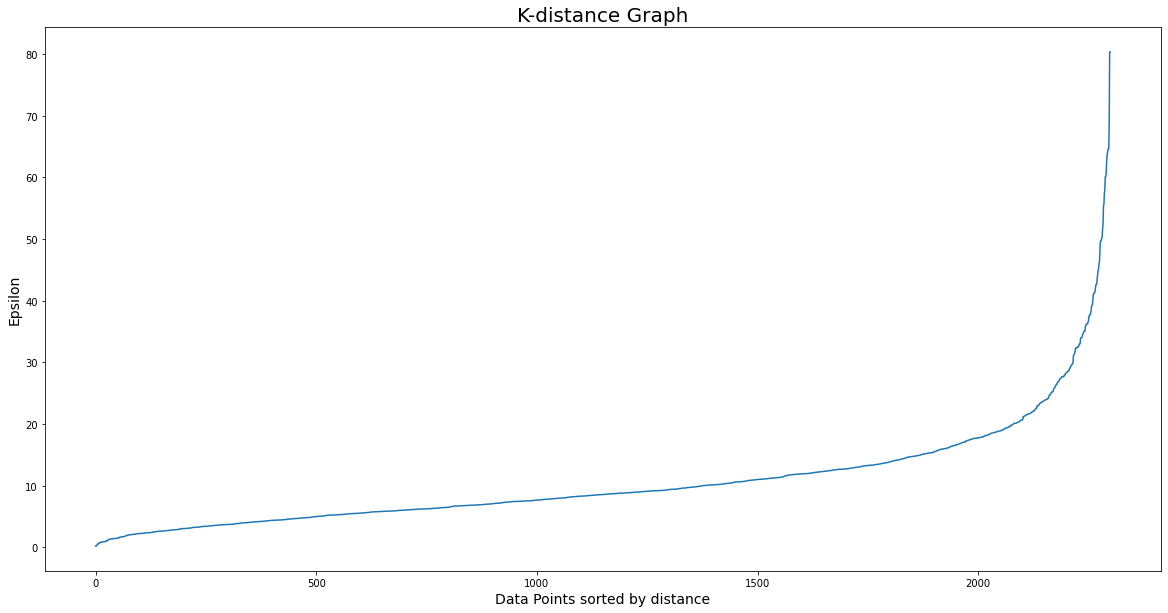

In [29]:
# Plotting K-distance Graph
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(20,10))
plt.plot(distances)
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

The optimum value of epsilon is at the point of maximum curvature in the K-Distance Graph, which is around 35 in this case.

Now looking for minPoints value, that also depends on domain knowledge...

In [49]:
from sklearn.cluster import DBSCAN
dbscan_opt=DBSCAN(eps=30,min_samples=4)
dbscan_opt.fit(df[[0,1]])

DBSCAN(eps=30, min_samples=4)

In [50]:
df['DBSCAN_opt_labels']=dbscan_opt.labels_
df['DBSCAN_opt_labels'].value_counts()

 0    1058
 2     742
 4     317
-1     170
 1       5
 3       5
 5       3
Name: DBSCAN_opt_labels, dtype: int64

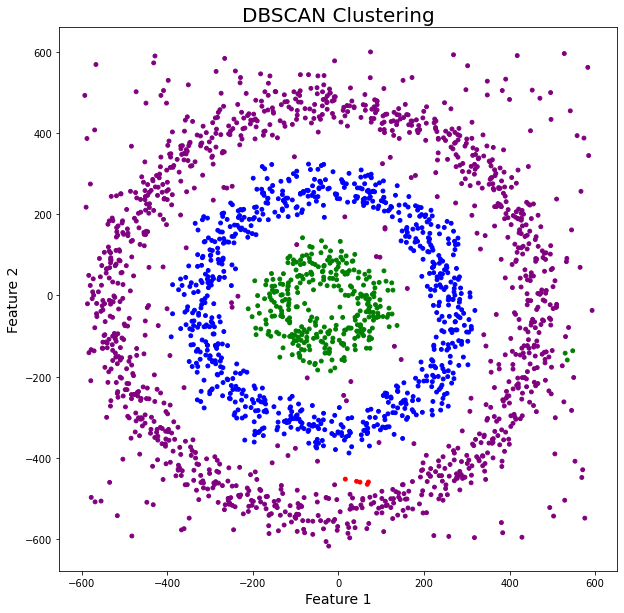

In [65]:
# Plotting the resulting clusters
plt.figure(figsize=(10,10))
plt.scatter(df[0],df[1],c=df['DBSCAN_opt_labels'],cmap=matplotlib.colors.ListedColormap(colors),s=15)
plt.title('DBSCAN Clustering',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()

Optimizing number of clusters...

In [122]:
for idx, min_sample_value in enumerate([1,2,3,4,5,6,7,8,9,10]):

    dbscan_opt = DBSCAN(eps=35,min_samples=min_sample_value)
    dbscan_opt.fit(df[[0,1]])
    
    unique_clusters = set(list(dbscan_opt.labels_))

    print(
        f'\nOption {idx+1} (min_samples = {min_sample_value}) : {len(unique_clusters)} Unique clusters',
        f'named {unique_clusters}.',
        )


Option 1 (min_samples = 1) : 89 Unique clusters named {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88}.

Option 2 (min_samples = 2) : 30 Unique clusters named {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, -1}.

Option 3 (min_samples = 3) : 13 Unique clusters named {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, -1}.

Option 4 (min_samples = 4) : 6 Unique clusters named {0, 1, 2, 3, 4, -1}.

Option 5 (min_samples = 5) : 4 Unique clusters named {0, 1, 2, -1}.

Option 6 (min_samples = 6) : 4 Unique clusters named {0, 1, 2, -1}.

Option 7 (min_samples = 7) : 4 Unique clusters named {0, 1, 2, -1}.

Option 8 (min_samples = 8) : 4 Unique clusters n

After choosing parameters... i.e. best were *eps=45*, *min_samples=5*

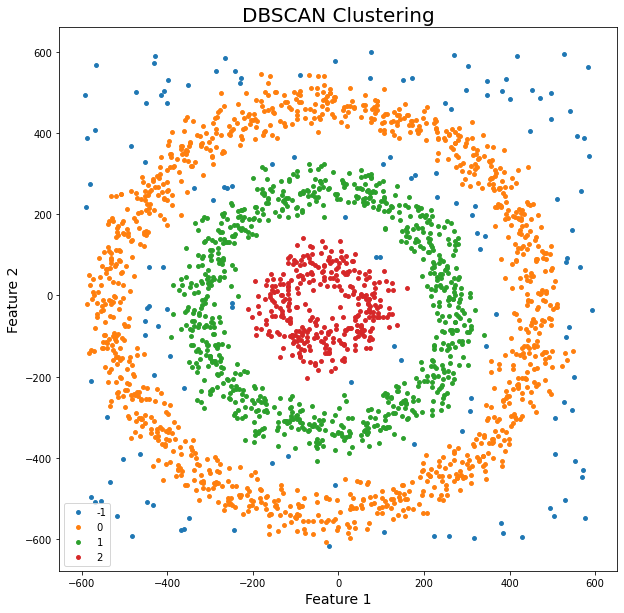

In [124]:
min_sample_value = 5

dbscan_opt = DBSCAN(eps=35,min_samples=min_sample_value)
dbscan_opt.fit(df[[0,1]])

df['DBSCAN_opt_labels']=dbscan_opt.labels_
df['DBSCAN_opt_labels'].value_counts()

# Plotting the resulting clusters
plt.figure(figsize=(10,10))

grouped = df.groupby('DBSCAN_opt_labels') # Group data by labels

# Create a scatter plot for each group
for label, group in grouped:
    plt.scatter(group[0], group[1], label=label,cmap=matplotlib.colors.ListedColormap(colors),s=15)


plt.title('DBSCAN Clustering',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.legend()
plt.show()

In conclusion, of course, each study depends on many factors, but the aim here was to separate the rings in a closed way and consider floating points as values that don't belong to a class. This is just one example of a study and cannot be considered a general rule. Each case is unique.